# Project Description
**This Project will be focusing on House Prices Prediction using dataset from Kaggle.**\
In this project, it covers a complete Machine Learning Workflow as below:
1. Libraries import
2. Feature Engineering
3. Exploratory Data Analysis
4. ML Model Selection
5. ML Models Train Test
6. Metrics Evaluation Comparison between ML Models

Lastly, this project will be using Linear Regression model from a custom-built algorithm and comparing it with Scikit-Learn's Linear Regression model. We will be comparing their metrics evaluation using the same dataset and workflow processes

# 0. Import All necessary libraries
Below are all the libraries that we need
1. Pandas for data preprocessing
2. Scikit-Learn for data preprocessing, ML model and metrics
3. Seaborn for Exploratory Data Analysis
4. CustomLinearRegression for our custom ML model
5. Matplotlib for result graph plotting

In [1]:
# Import all necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from CustomLinearRegression import LinearRegressionGD

# 1. Dataset Loading and Data Cleaning
In this part, we will be loading our dataset from csv file.\
Afterward, we will be reading some data samples from the dataset, and perform data cleaning.

In [2]:
# Step 1: load and read datasets
df = pd.read_csv("Housing.csv")
print(df.head()) # Print the first 5 data samples from the dataset

num_features = df.select_dtypes(exclude=['object']).columns.drop('price') # By excluding object data type we're left only with features that are numerical
cat_features = df.select_dtypes(include=['object']).columns # By including object data type we're limiting to only categorical features
print(f"\nNumerical features in dataset: {num_features.tolist()}")
print(f"Categorical features in dataset: {cat_features.tolist()}\n")

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Numerical features in dataset: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical

# 2. Feature Engineering
- The goal of feature engineering is to transform our raw dataset into more meaningful data features so that it helps our Machine Learning model to understand the pattern and relationship more effectively.
- You may think of it as organizing a messy document to make it tidy so that it can be understood by others easily, but in this scenario for our AI models

The process of feature engineering in this case will be broken down into 6 sub-parts:
1. Data Cleaning: Helps to remove any N/A or duplicated data
2. Feature Creation: Deriving new features by combining previous features together to make their relationship more obvious and easier for our model to learn their patterns
3. Data Splitting: Split the dataset into training and testing dataset to prevent data leakage
4. Encoding: We perform OneHotEncoding for categorical data and ScalarEncode for numerical data

# 2a) Data Cleaning
In Data Cleaning, our goal is to find:
1. Any missing data (N/A)
2. Any duplicated data.

These data will confuse our model and leads to poor performance. Thus, we need to remove them in our dataset.

In [3]:
# Step 2a) : Data preparation and cleaning
print(df.isna().sum()) # check if there's any missing data (na)
df.dropna(inplace=True) # inplace=True means dropping all rows with N/A data instead of making N/A data as 0
print(df.duplicated().sum()) # check for any duplicated data
df.drop_duplicates(inplace=True)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
0


# 2b) Feature Creation
In Feature Creations, we are deriving new features on our dataset. This is because right now our dataset have many features and some of them might be more depending on each other than others.

As a result, we will be combining the features that are more dependent on each other, creating an obvious pattern of relationships between features to let our ML model aware of it. This smoothens the process of our model to learn the relationships between all 18 features and focus on the relevant ones.

**Here are some of the combined features we'll be implementing:**
1. Relationship between Area and Bathroom Number
2. Relationship between Bathroom Number and Number of Stories
3. Relationship between Number of Stories and Number of Parking Lots
4. Emphasise on Area feature by creating an Area_Squared feature

In [4]:
# Step 2b) Feature Creation: We are deriving new features by combining previous features together to make their relationship more obvious and easier for our model to learn their patterns
df['area_bathrooms'] = df['area'] * df['bathrooms'] # Combining feature Area and feature Bathroom Numbers
df['bathrooms_stories'] = df['bathrooms'] * df['stories'] # Combining feature Bathroom Numbers and Number of Stories
df['stories_parking'] = df['stories'] * df['parking'] # Combining feature Number of Stories and Parking Lot Numbers
df['area_squared'] = df['area'] ** 2 # Emphasizing Area feature by squaring it

# 2c) Data Splitting
In Data Splitting, we will be splitting our dataset into training and testing dataset.

Our ML model will be trained using the training dataset, where it begins 'learning' process by making prediction and learning from mistakes by minimizing the Mean Square Error (MSE) loss, which is the error of the model.

Afterward, our ML model will be tested on the testing dataset, where it will use its trained parameters (Weights and Bias) to make prediction on house prices based on unseen data.

Thus, it is **very essential** to ensure that our training and testing dataset are well-separated with no leakage or mixing to ensure the integrity and fairness of our ML model performance.

Lastly, we will be using train_test_split() function from Scikit-Learn library to perform data splitting.

In [5]:
# Step 2c) Data Splitting: We split the dataset into training and testing dataset to prevent data leakage
y = df['price'] # Extract the target(output - house price) from our dataset
X = df.drop(['price'], axis=1) # Obtain the dataset input feature by extracting the target away from it
# Print X and y shape details (Row, Columns)
print(y.shape)
print(X.shape)

# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Test_size=0.2 means that 20% of the dataset is used for testing phase
# Print X_train, X_test, y_train and y_test shape details (Row, Columns)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(545,)
(545, 16)
(436, 16)
(109, 16)
(436,)
(109,)


# 2d) Data Encoding
In Data Encoding, we will be performing 2 types of data encoding methods:
1. OneHotEncoding
2. StandardScaler

In OneHotEncoding, the goal is to convert any categorical data into numerical data. This is because our model couldn't understand Strings. Thus, we need to convert it into number so that it is understandable by our model to continue training and testing.

For example, feature **airconditioning** has the value [yes, no], which will be converted into [0, 1] after OneHotEncoding such that (0 represents yes and 1 represents no).

On the other hand, in StandardScaler, the goal is to standardize the numerical data to prevent from gradient exploding. This is crucial as our model contains of large numbers like prices. Thus, by standardize it to make the value smaller, it prevents the model from exponentially increase the gradient value and potentially broke down.

In [6]:
# Step 2d) Data Encoding: We perform data encoding to further improve our dataset so that it is better understood by our ML model
# We use ColumnTransformer from Scikit-Learn as it is able to combine multiple encoding methods to target different data features type in our model, making it efficient.
# In this scenario we use Standardization (StandardScaler) for numerical features and OneHotEncoding (OneHotEncoder) for categorical features
ct = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features), #
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
    ]
)
X_train_encoded = ct.fit_transform(X_train, y_train)
X_test_encoded = ct.transform(X_test)

# 3. Exploratory Data Analysis
In Machine Learning, it is crucial for us to perform basic Data Analysis on our dataset, as it helps us to understand better the dataset ourselves and how well the dataset actually is.

In this EDA, we will be covering:
1. Statistics of our target(price y) value
2. Numerical feature analysis (i.e. bedroom numbers comparison, bathroom numbers comparison, etc.)
3. Relationship between different features in the dataset (i.e. bedroom num vs price, bathroom num vs price, etc.)
4. Heatmap showing correlation matrix between few features in the dataset

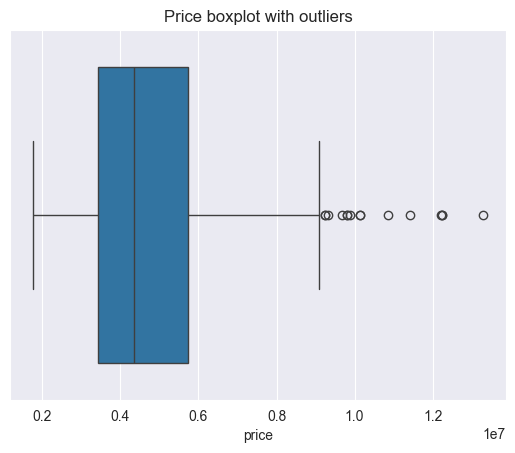

8400000.0


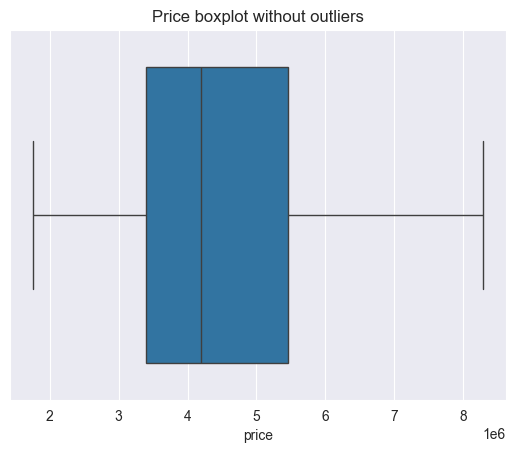

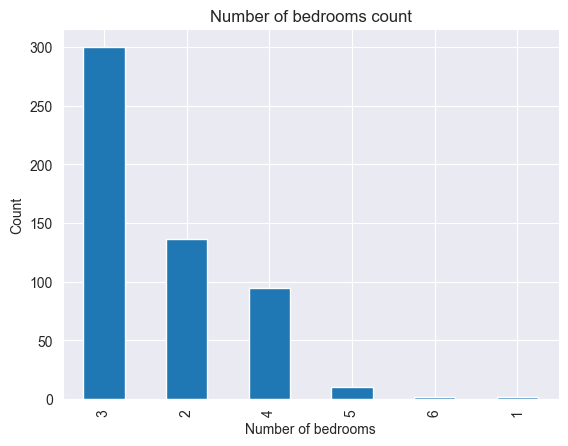

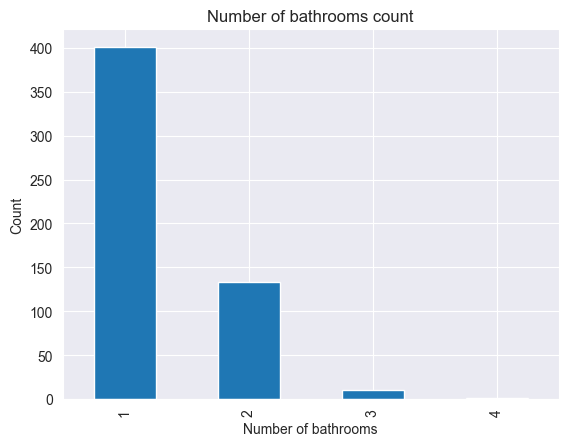

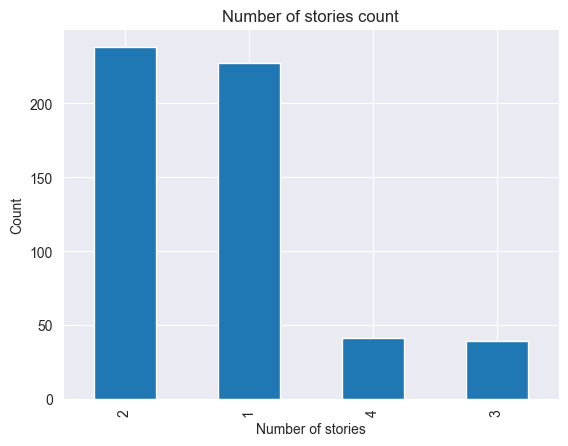

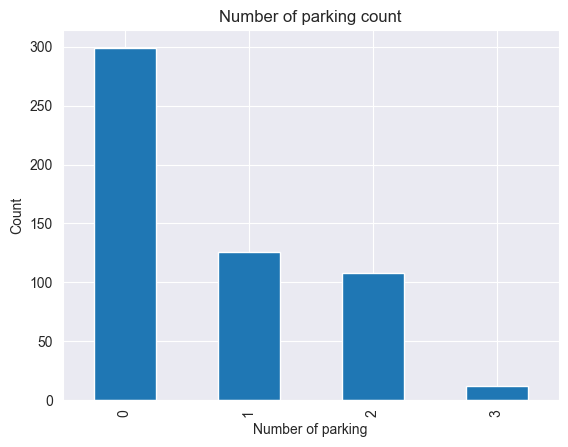

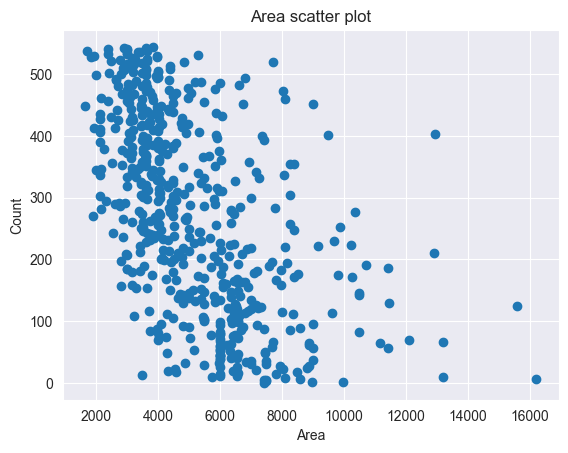

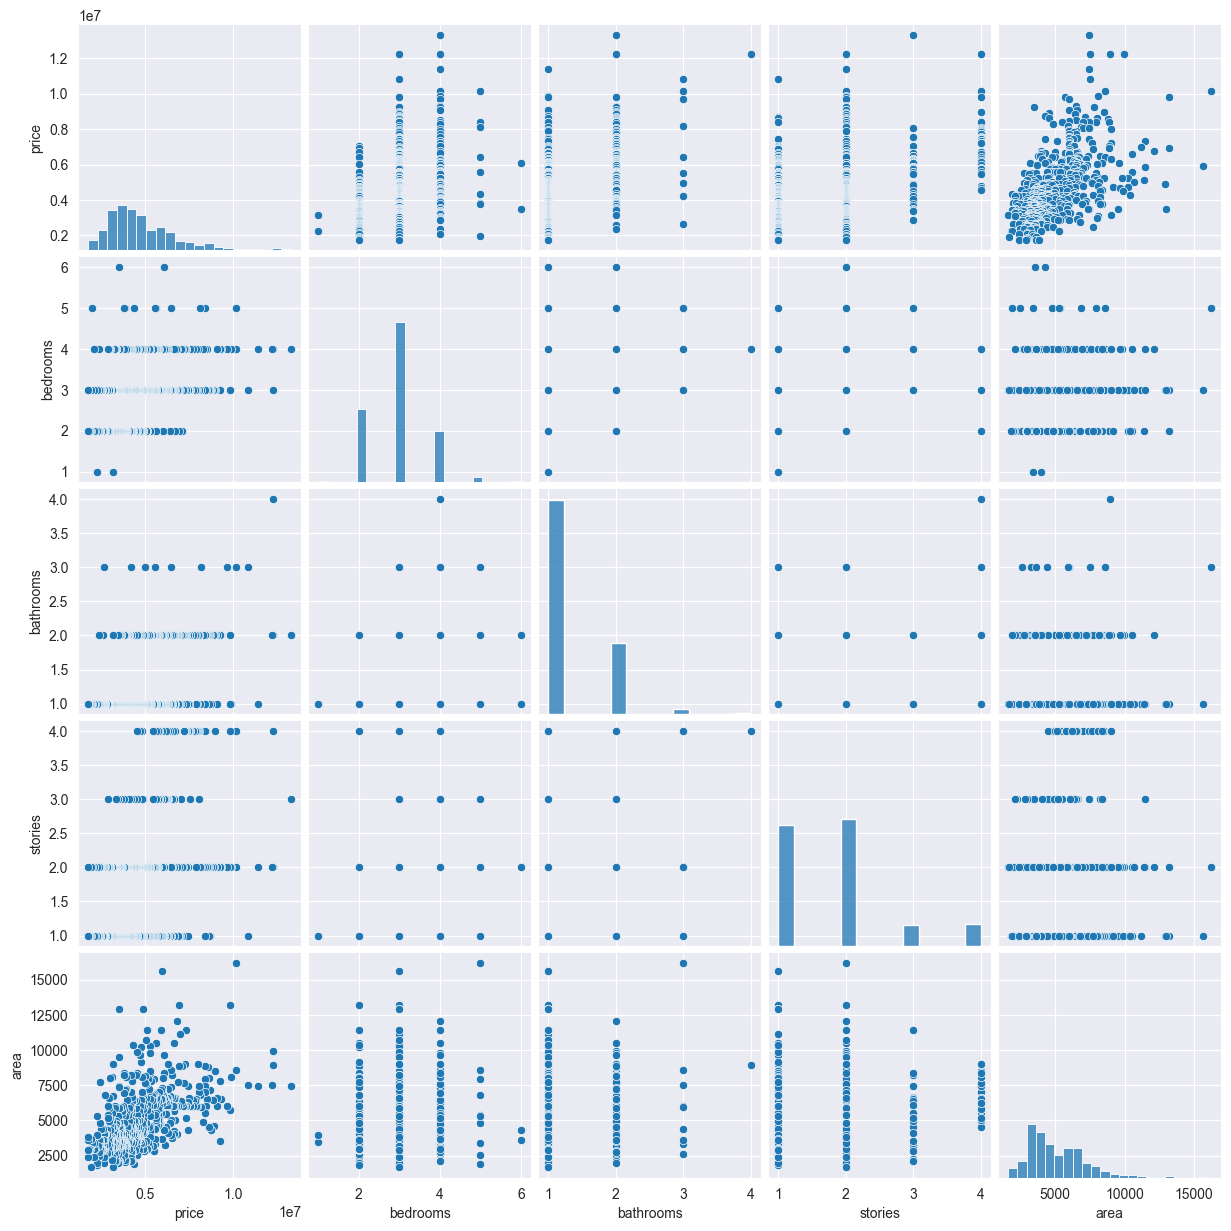

              price  bedrooms  bathrooms   stories   parking      area
price      1.000000  0.366494   0.517545  0.420712  0.384394  0.535997
bedrooms   0.366494  1.000000   0.373930  0.408564  0.139270  0.151858
bathrooms  0.517545  0.373930   1.000000  0.326165  0.177496  0.193820
stories    0.420712  0.408564   0.326165  1.000000  0.045547  0.083996
parking    0.384394  0.139270   0.177496  0.045547  1.000000  0.352980
area       0.535997  0.151858   0.193820  0.083996  0.352980  1.000000


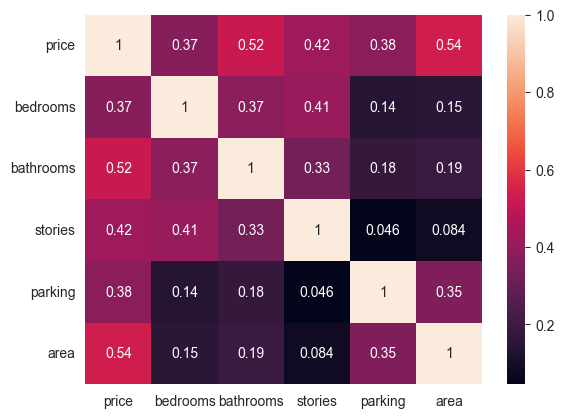

In [7]:
# Step 3: Exploratory Data Analysis

# a): Feature understanding and visualisation
# i. boxplot with outliers
sns.boxplot(data=df, x='price').set_title("Price boxplot with outliers")
plt.show()

# ii. boxplot without outliers
outlier_cutoff = df.price.quantile(0.95) # We will be cutting off the 95th quartile of our target price column in our dataset
print(outlier_cutoff)
sns.boxplot(data=df[df['price'] < outlier_cutoff], x='price').set_title("Price boxplot without outliers")
plt.show()

# b) bar graph for the number of bedrooms, bathrooms, stories and parking

# i. bedrooms
ax = df['bedrooms'].value_counts().plot(kind='bar', title="Number of bedrooms count")
ax.set_xlabel("Number of bedrooms")
ax.set_ylabel("Count")
plt.show()

# ii. bathrooms
ax = df['bathrooms'].value_counts().plot(kind='bar', title="Number of bathrooms count")
ax.set_xlabel("Number of bathrooms")
ax.set_ylabel("Count")
plt.show()

# iii. stories
ax = df['stories'].value_counts().plot(kind='bar', title="Number of stories count")
ax.set_xlabel("Number of stories")
ax.set_ylabel("Count")
plt.show()

# iv. parking
ax = df['parking'].value_counts().plot(kind='bar', title="Number of parking count")
ax.set_xlabel("Number of parking")
ax.set_ylabel("Count")
plt.show()

# v. area
ax = df['area'].value_counts()
plt.scatter(df['area'], df.index)
plt.xlabel("Area")
plt.ylabel("Count")
plt.title("Area scatter plot")
plt.show()

# c): Relationship between variables
# We use pairplot to describe the relationship between each combination of 2 variables against each other
# Since there are 5 variables, in total there will be 25 combination of graphs in pairplot
sns.pairplot(df[["price", "bedrooms", "bathrooms", "stories", "area"]])
plt.show()

# d) heatmap
df_corr = df[["price", "bedrooms", "bathrooms", "stories", "parking", "area"]].dropna().corr()
print(df_corr)
sns.heatmap(df_corr, annot=True)
plt.show()



# 4. Machine Learning Model Selection
It is essential for us to identify the suitable ML Algorithm used for our dataset.

Since our Housing Dataset has a continuous value, where our target, y represents the house price carries actual number values(house price:$1000000) instead of categorical data(yes, no), we should use a regression algorithm to predict continuous value(house prices)

Thus, Linear Regression will be our best option here.

# 4a) Comparison between Linear and Logistic Regression
**1. Linear Regression**
The formula for Linear Regression can be as follows:
$$y = \theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n} + b$$
**Where:**\
y = Actual value\
x = Value for each feature\
$\theta_{n}$ = Weights for each feature (1-n)\
b = Bias

- The value of the target y, can be anywhere from 0 to ∞ (i.e. Predicted house prices: $2340000)
- It takes in the input value of each feature and multiply it with the weights, and add with a bias, to produce a predicted y value(house prices).

**2. Logistic Regression**
The formula for Logistic Regression can be as follows:
$$\frac{1}{1+e^{-(b_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{m}x_{m})}}\\= \frac{1}{1+e^{-z}}$$

**Where:**\
z = $y = \theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n} + b$\
$\theta_{m}$ = Weights for mth column (mth feature)\
$x_{m}$ = Value for the mth column (mth feature)\
$b_{0}$ = Bias

- The value of the target y represents categorical data (i.e. 0 - not spam; 1 - spam)
- It takes in the input value of each feature and multiply it with the weights and add with a bias, to produce a continuous output.
- The output is then converted into probabilistic value using activation function like sigmoid (i.e. 0.5635634).
- Finally, by implementing a certain treshold (i.e. y > 0.5), the probabilistic value is then converted into a class label which represents the model's prediction (i.e. 0.65785 -> 1 (Spam email))

In short, though both Linear and Logistic Regression falls under the same Linear Model family, Linear Regression directly predicts an actual number, while Logistic Regression takes a step further to convert the actual number into probability value, and round the probability value off to the nearest categorical value.

In the end, Linear Regression is more suitable for housing price prediction as we want an actual number as output (regression), not class label (categorical)

# 4b) Use case of Linear and Logistic Regression:
**1. Linear Regression:**\
a) House Pricing\
b) Student Grade\

**2. Logistic Regression:**\
a) Spam Email (0 - true, 1 - false)
b) Heart Disease (0 - true, 1 - false)
c) Credit Card Fraud (0 - true, 1 - false)

# 5. Comparison between Custom Linear Regression and Scikit-Learn Linear Regression Model
In this part, we will be training and testing 2 Linear Regression models, to determine the proof-of-concept of our custom LR model and compare its performance with industry standard LR model:
1. Custom Linear Regression Model
2. Scikit-Learn Linear Regression Model

In my Custom Linear Regression Model, it includes the following blocks of mathematical concepts that forms together:
1. Linear Regression Formula
$$
y = \theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n} + b
$$
**Where:**\
y = Actual value\
x = Value for each feature\
$\theta_{n}$ = Weights for each feature (1-n)\
b = Bias

2. Mean Square Error Loss
**Formula:**\
$$
\frac{1}{n}\sum_{i=1}^{n}(\hat{y_{i}}-y_{i})^{2}
$$
**Where:**\
n = Number of total rows (Total dataset count)\
$\hat{y}$ = Predicted value\
y = Actual value

3. L1 Lasso Regularisation
**Formula:**\
$$
\lambda\sum_{i=1}^{m}|\theta_{i}|
$$
**Where:**\
$\lambda$ = l1 penalty constant (recommended: 0.0001)\
m = Number of total columns (Total features in a dataset)\
$w_{i}$ = Weights for each feature (from 1 - m)\

**Combining L1 (Lasso) Regularisation with MSE:**\
$$
\frac{1}{n}\sum_{i=1}^{n}(\hat{y_{i}}-y_{i})^{2} + \lambda\sum_{i=1}^{m}|\theta_{i}|
$$

4. Root Mean Square Error Formula
**Formula:**
$$\sqrt{\sum_{i=1}^{n}(\hat{y}_{i}-y_{i})^{2}}$$

5. R-Square Formula
$$1 - \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{\sum_{i=1}^{n}(y_{i}-\bar{y}_{i})^{2}}$$

**Where:**\
$y_{i}$ = Actual value for ith index\
$\hat{y}_{i}$ = Predicted value for ith index\
$\bar{y}_{i}$ = Mean of the actual value

**For detailed explanation, of the formula, you may refer to the algorithmic explanation from my ML-Algorithm Repository for Linear Regression**

# 5a) Custom Linear Regression Model Train Test

Epoch: 0 | Train loss: 25234796967081.164 | Test loss: 30129998688053.996
Epoch: 500 | Train loss: 1388396643173.5083 | Test loss: 2463074958779.524
Epoch: 1000 | Train loss: 1177914654681.8743 | Test loss: 2083571341010.0486
Epoch: 1500 | Train loss: 1106117521957.6943 | Test loss: 1979288421799.7751
Epoch: 2000 | Train loss: 1070065105728.865 | Test loss: 1931026314516.983
Epoch: 2500 | Train loss: 1048155213300.586 | Test loss: 1901742166099.5962


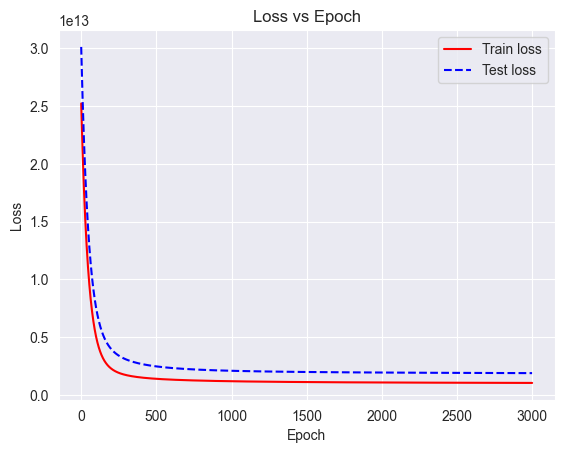

In [8]:
# Step 5a) Training and testing with Custom Linear Regression Model
# Training
model1 = LinearRegressionGD(lr=0.001, l1=0.0001, epoch=3000, init='random')
model1.fit(X_train_encoded, y_train, X_test_encoded, y_test)

# Testing
y_pred_1 = model1.predict(X_test_encoded)

# 5b) Scikit-Learn Linear Regression Model Train Test

In [9]:
# Step 5b) Training and testing with Scikit-Learn Linear Regression Model
# Training
model2 = LinearRegression(fit_intercept=True).fit(X_train_encoded, y_train)

# Testing
y_pred_2 = model2.predict(X_test_encoded)

# 6. Metrics Evaluation and Comparison between 2 models
In the metrics evaluation phase, we will be comparing both models' performance based on the following criterias:
1. Root Mean Square Error (RMSE)
2. R_Square (R^2) Value

# 6a) Scikit-Learn Linear Regression Model Performance Evaluation


---------------------Metrics Evaluation Score for Custom Linear Regression Model---------------------
Root mean square error: 1371525.4715630158
R_square: 0.6278452910015653

Scatter Plot of Actual vs Predicted Values...


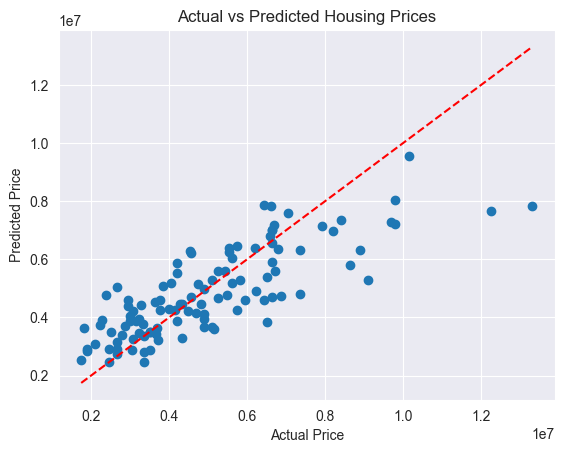

In [10]:
# Step 6a): Custom Model Performance Evaluation
print("---------------------Metrics Evaluation Score for Custom Linear Regression Model---------------------")
print(f"Root mean square error: {model1.root_mean_squared_error(y_pred_1, y_test)}")
print(f"R_square: {model1.r_squared(y_pred_1, y_test)}")

print("\nScatter Plot of Actual vs Predicted Values...")
plt.scatter(y_test, y_pred_1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title("Actual vs Predicted Housing Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

# 6b) Scikit-Learn Linear Regression Model Performance Evaluation

In [11]:
# Step 6b) Scikit-Learn Model Performance Evaluation
print("---------------------Metrics Evaluation Score for Scikit-Learn Linear Regression Model---------------------")
print("Root mean squared error: ", root_mean_squared_error(y_test, y_pred_2))
print("R^2 value:", r2_score(y_test, y_pred_2))

---------------------Metrics Evaluation Score for Scikit-Learn Linear Regression Model---------------------
Root mean squared error:  1324506.9600914407
R^2 value: 0.6529242642153174


# 7. Conclusion

In this project, we have implemented a custom Linear Regression model from scratch using Gradient Descent optimization methods and evaluated it against Scikit-Learn’s built-in `LinearRegression` model. The objective is to validate the accuracy of the custom model's theoretical concepts, mathematical formulation and overall implementation by comparing its performance with an industry-standard model.

The performance comparison between the two models is summarized as below:

| Model                     | R² Score | RMSE |
|---------------------------|---------:|-------------:|
| Custom Linear Regression  | 0.628    | 1,371,525 |
| Scikit-Learn Linear Regression| 0.653    | 1,324,507 |

Based on the results, our custom model achieves similar performance metrics with Scikit-Learn’s implementation. Although the Scikit-Learn model attains slightly better results, this is expected due to its more advanced numerical optimizations. Nevertheless, our custom Linear Regression model has demonstrated accuracy and completeness that even rivals an industry-standard model.

This outcome validates that the mathematical foundations which includes gradient loss derivations, l1-ridge regularization, and metrics calculation used in the custom model are sound and correctly implemented. Most importantly, it proves to us that a manually implemented optimization-based linear regression model can effectively approximate the performance of a production-grade library when proper data preprocessing and training procedures are followed.

Overall, this project successfully demonstrates a complete machine learning workflow from feature engineering and exploratory data analysis, to model implementation, evaluation, and comparison, all while reinforcing a deep understanding of linear regression and gradient descent-based optimization models.
